# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Question 1

256


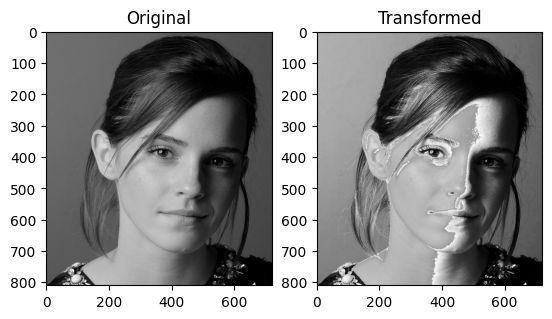

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Breakpoints from the graph (input, output)
c = np.array([(50, 50), (150, 255), (150, 150)])

# Create a lookup table (LUT) based on the breakpoints
# The LUT will map input pixel values to output pixel values
t1 = np.linspace(0, c[0,1], c[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0], dtype=np.uint8)
t3 = np.linspace(c[2,1] + 1, 255, 255 - c[2,0], dtype=np.uint8)

# Concatenate segments to form the complete LUT
# Each segment corresponds to a range of input pixel values
transform = np.concatenate((t1, t2), axis=0)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
print(len(transform))  

# Load image (grayscale)
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# Display results
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed')
plt.show()


#### Question 2

White Matter

(256,)


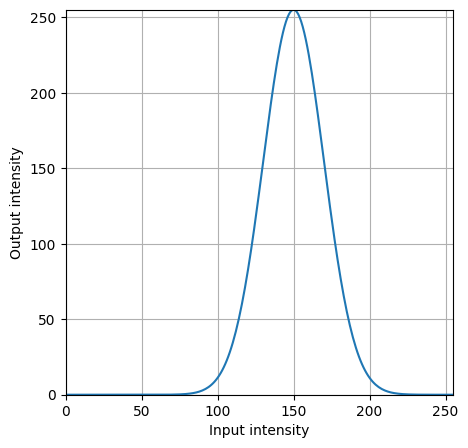

In [18]:
# Load image (grayscale)
image = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define the gaussian pulse
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

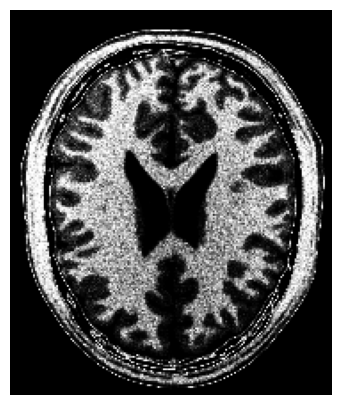

In [19]:
g = t[image]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Gray Matter

(256,)


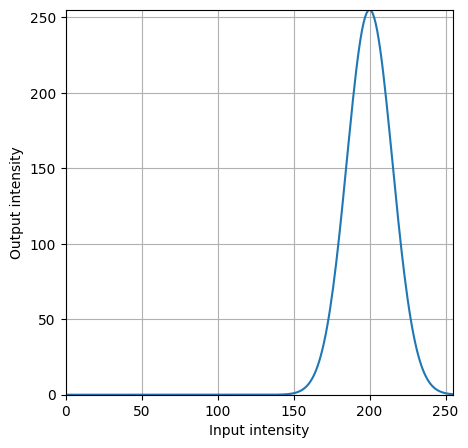

In [20]:
mu = 200
sigma = 15
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

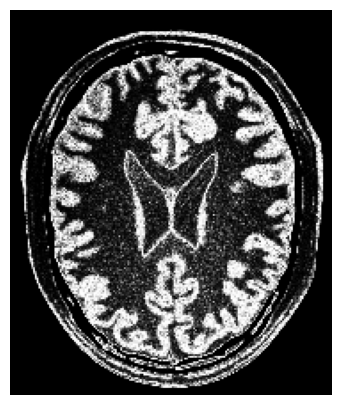

In [21]:
g = t[image]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Question 3

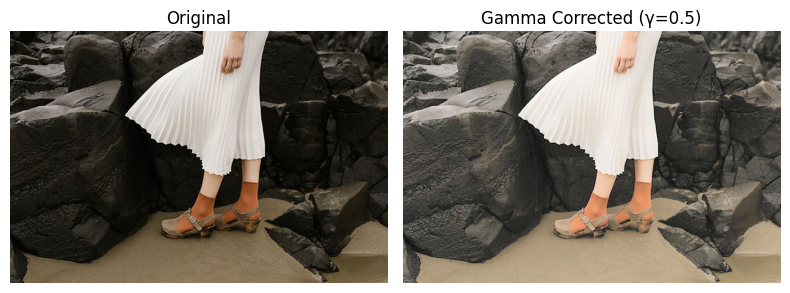

In [22]:
imq3_bgr = cv.imread('Images/highlights_and_shadows.jpg')
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Split the image in to L*a*b* color space
L,a,b = cv.split(imq3_lab)

# Apply gamma correction to the L channel
# Gamma correction formula: L' = L^γ
gamma = 0.5
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()